### Problem Statement

Analyzing the Tesla stock dataset from 2010 to 2020 to identify key trends, patterns, and factors influencing stock performance. The goal is to develop predictive models that can assist investors in making informed decisions and understanding the dynamics of Tesla's stock movements over the past decade.







#### importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Collecting The Data

In [2]:
df=pd.read_csv(r"C:\Users\AorusHome\Desktop\JypyterPython\Machine Learning Rithik Sir\TSLA.csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300.0
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100.0
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800.0
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800.0
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900.0
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500.0
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500.0
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700.0
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300.0


### Description of columns:
Open: The opening price of the stock at the beginning of the trading period.

High: The highest price the stock reached during the trading period.

Low: The lowest price the stock reached during the trading period.

Close: The closing price of the stock at the end of the trading period.

Adj Close (Adjusted Close): The closing price of the stock adjusted to account for corporate actions such as dividends, stock splits, or new stock offerings. This is considered a more accurate reflection of the stock's value.

Volume: The total number of shares traded during the trading period. It represents the level of market activity and liquidity.

### Exploring The Data

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2413.000000,2410.000000,2412.000000,2411.000000,2413.000000,2.415000e+03
mean,186.344335,189.759199,183.057438,186.659283,186.376216,5.574768e+06
std,118.711295,120.806839,116.795714,119.084711,119.123746,4.987827e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.349998,34.970001,33.725000,34.405001,34.400002,1.904450e+06
50%,213.100006,216.760002,208.959999,213.339996,212.960007,4.579600e+06
75%,266.450012,270.942512,262.102501,266.940002,266.769989,7.361200e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [5]:
df.shape

(2416, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2413 non-null   float64
 2   High       2410 non-null   float64
 3   Low        2412 non-null   float64
 4   Close      2411 non-null   float64
 5   Adj Close  2413 non-null   float64
 6   Volume     2415 non-null   float64
dtypes: float64(6), object(1)
memory usage: 132.2+ KB


In [7]:
df.isnull().sum()

Date         0
Open         3
High         6
Low          4
Close        5
Adj Close    3
Volume       1
dtype: int64

### Missing Value Treatment

In [8]:
df["Open"].fillna(df["Open"].mean(),inplace=True)

In [9]:
df["High"].fillna(df["High"].mean(),inplace=True)

In [10]:
df["Low"].fillna(df["Low"].mean(),inplace=True)

In [11]:
df["Close"].fillna(df["Close"].mean(),inplace=True)

In [12]:
df["Adj Close"].fillna(df["Adj Close"].mean(),inplace=True)

In [13]:
df["Volume"].fillna(df["Volume"].mean(),inplace=True)

In [14]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Data Visualization

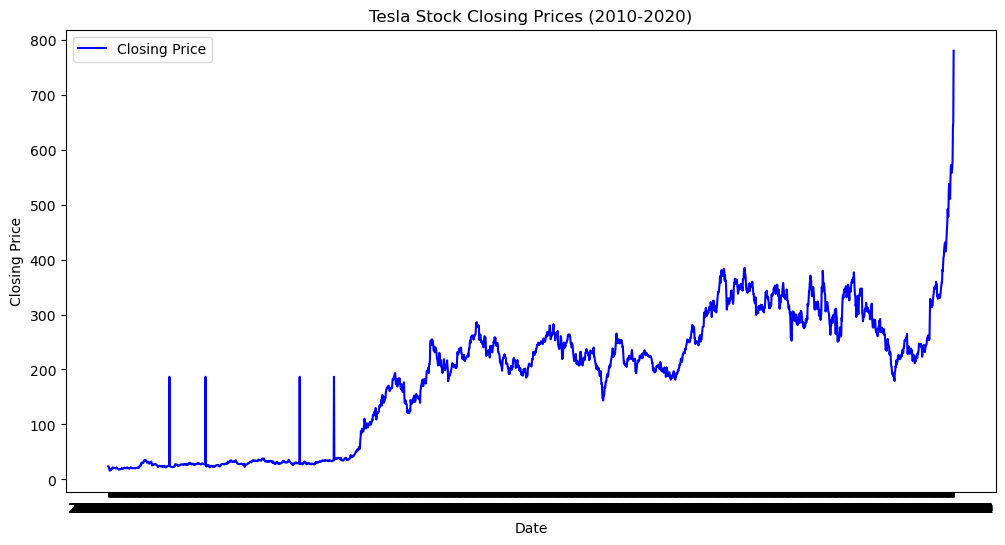

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.title('Tesla Stock Closing Prices (2010-2020)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [16]:
pip install --upgrade mplfinance


Note: you may need to restart the kernel to use updated packages.


In [17]:
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

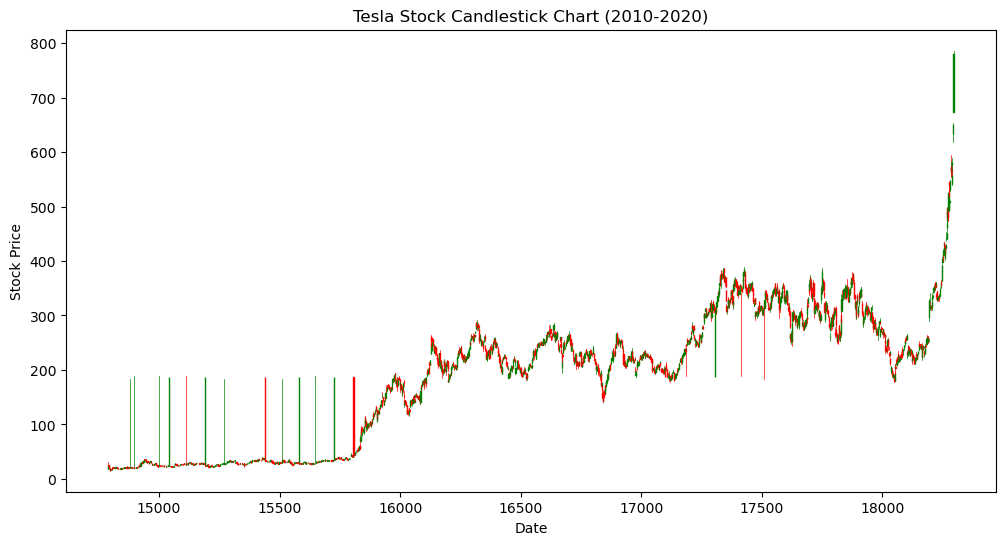

In [18]:
df_ohlc = df[['Date', 'Open', 'High', 'Low', 'Close']].copy()
df_ohlc['Date'] = pd.to_datetime(df_ohlc['Date'])
df_ohlc['Date'] = df_ohlc['Date'].apply(mdates.date2num)

plt.figure(figsize=(12, 6))
candlestick_ohlc(plt.gca(), df_ohlc.values, width=0.6, colorup='green', colordown='red')
plt.title('Tesla Stock Candlestick Chart (2010-2020)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

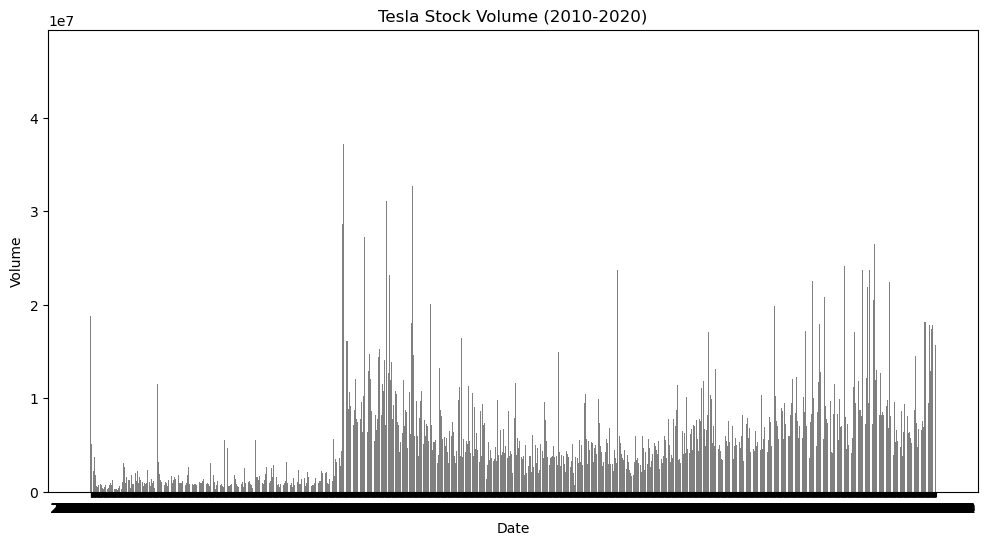

In [19]:
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Volume'], color='gray')
plt.title('Tesla Stock Volume (2010-2020)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

#### Checking For Skewness

In [20]:
df.skew().sort_values(ascending=False)

Volume       2.165735
Adj Close    0.017203
Close        0.014031
High         0.010629
Low         -0.011595
Open        -0.015071
dtype: float64

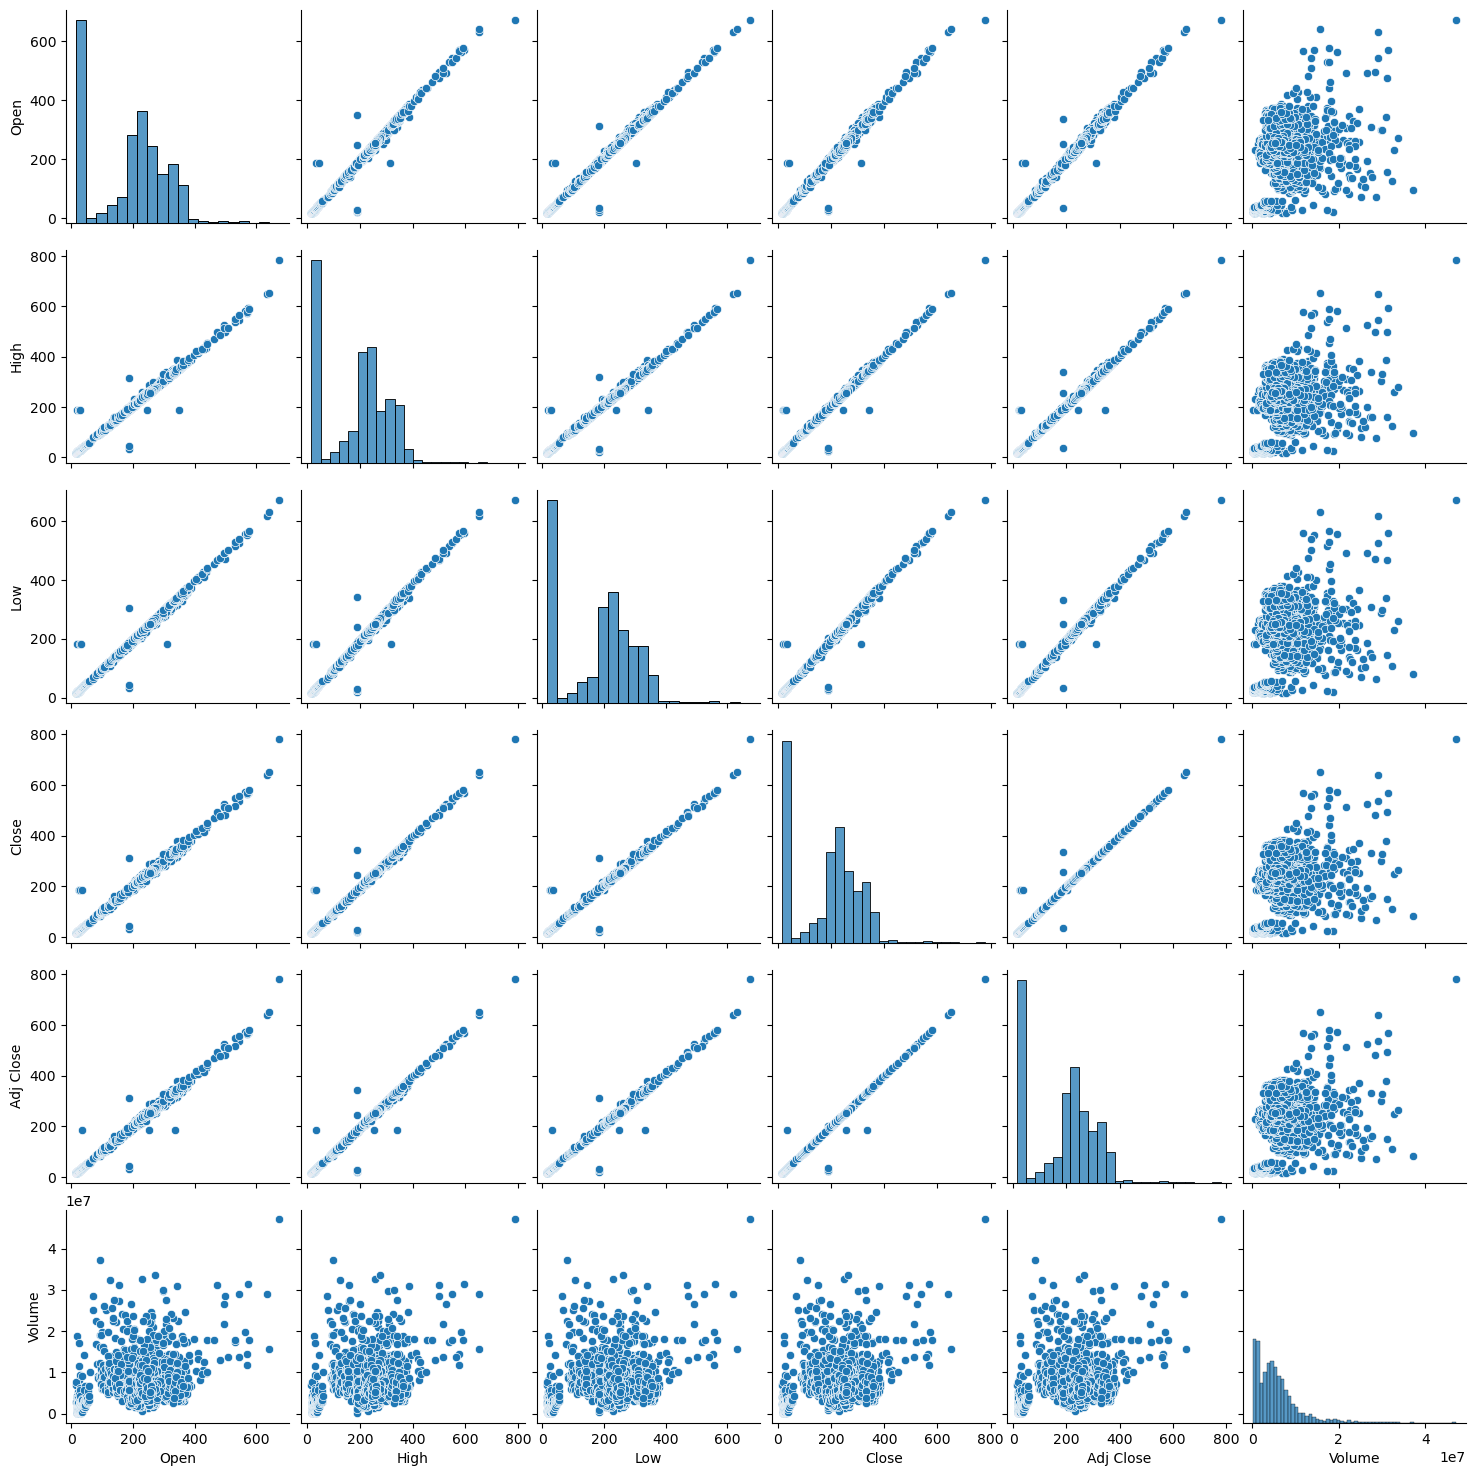

In [21]:
sns.pairplot(df)

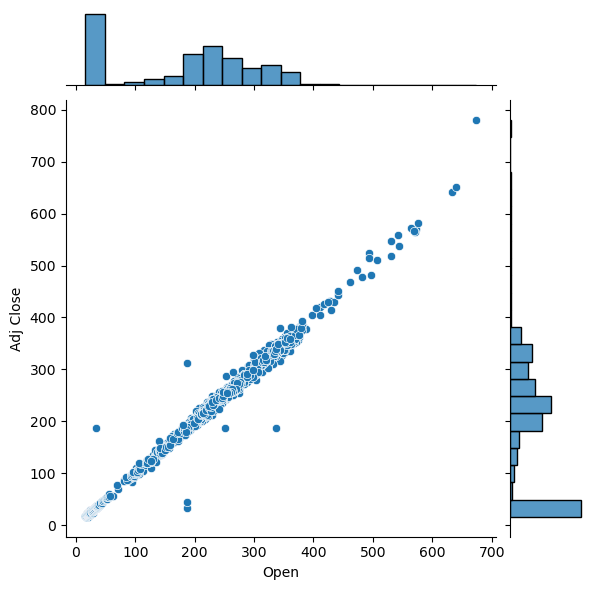

In [22]:
sns.jointplot(x='Open',y='Adj Close',data=df)

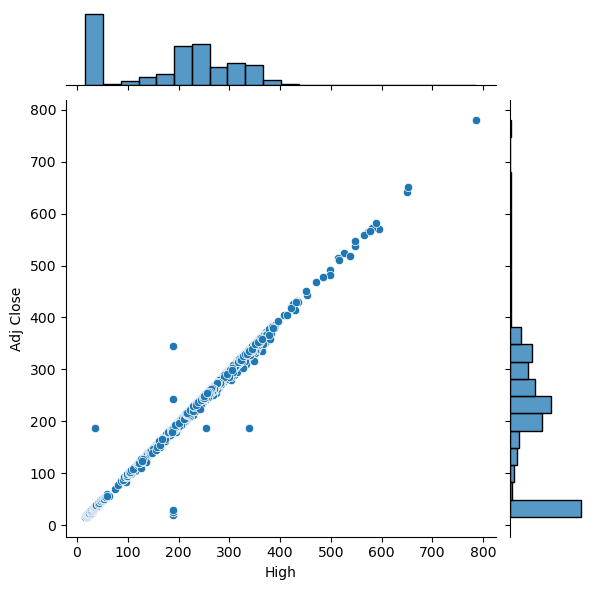

In [23]:
sns.jointplot(x='High',y='Adj Close',data=df)

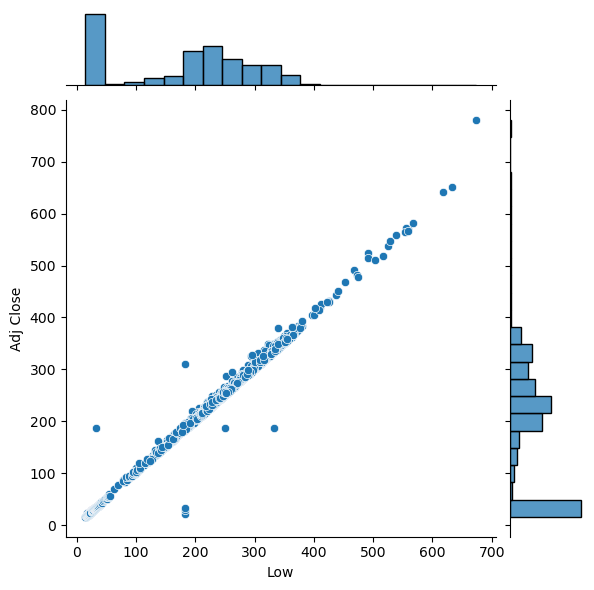

In [24]:
sns.jointplot(x='Low',y='Adj Close',data=df)

Since the Column "Volume" is Highly Skewed,We will remove its skewness by log transformation

In [25]:
A=df.iloc[:,1:]

In [26]:
A

,Open,High,Low,Close,Adj Close,Volume
0,19.000000,25.000000,17.540001,23.889999,23.889999,18766300.0
1,25.790001,30.420000,23.299999,23.830000,23.830000,17187100.0
2,25.000000,25.920000,20.270000,21.959999,21.959999,8218800.0
3,23.000000,23.100000,18.709999,19.200001,19.200001,5139800.0
4,20.000000,20.000000,15.830000,16.110001,16.110001,6866900.0
...,...,...,...,...,...,...
2411,568.489990,576.809998,558.080017,566.900024,566.900024,11788500.0
2412,575.690002,589.799988,567.429993,580.989990,580.989990,17801500.0
2413,632.419983,650.880005,618.000000,640.809998,640.809998,29005700.0
2414,640.000000,653.000000,632.520020,650.570007,650.570007,15719300.0


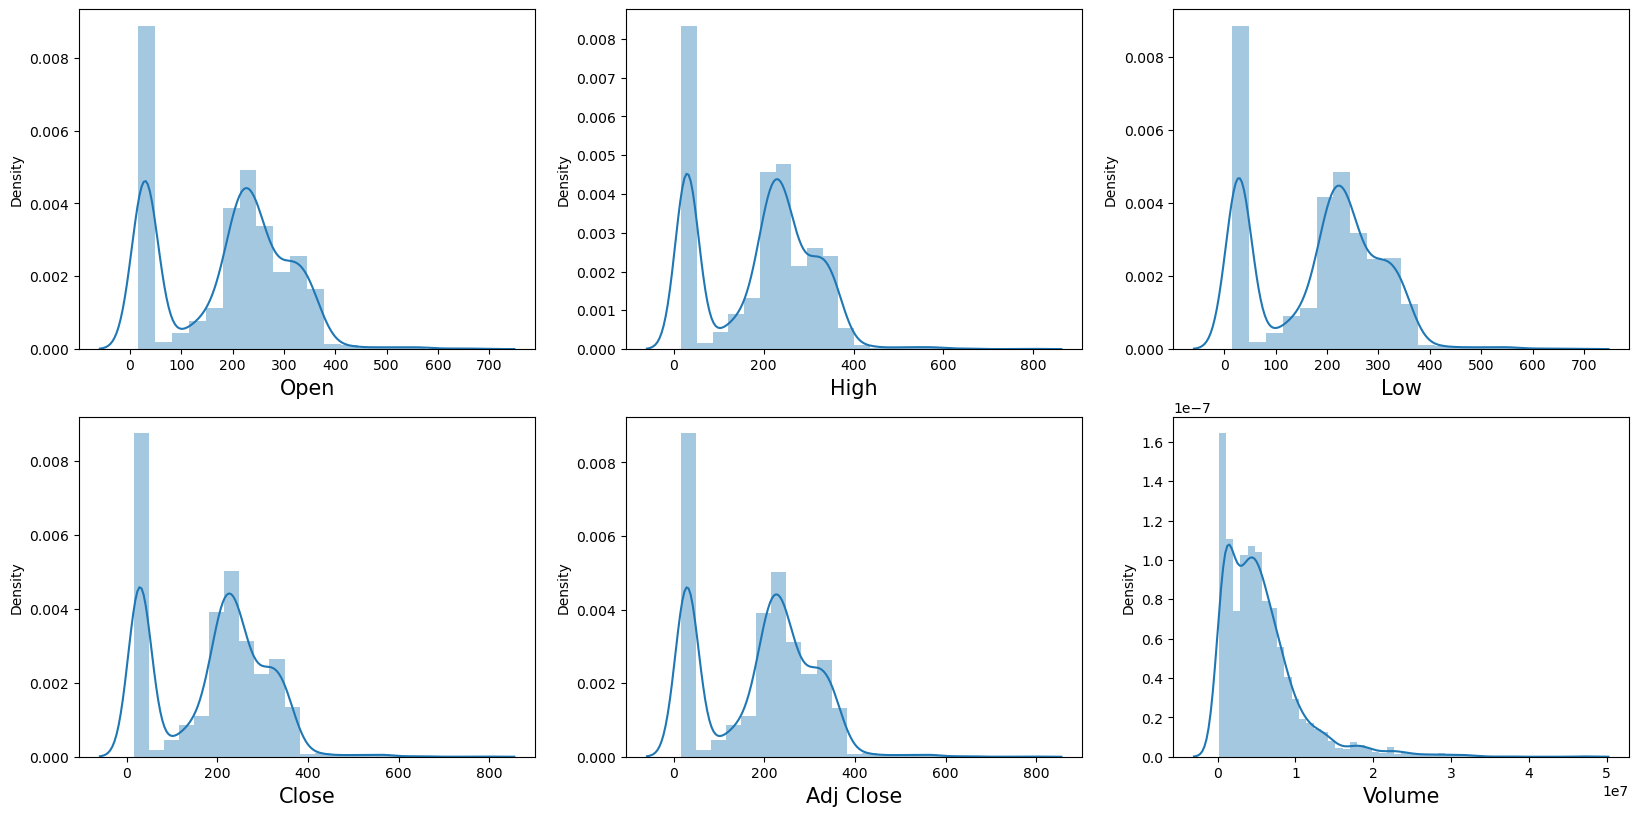

In [27]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in A:
    if plotnumber <= 8:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(A[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

<Axes: >

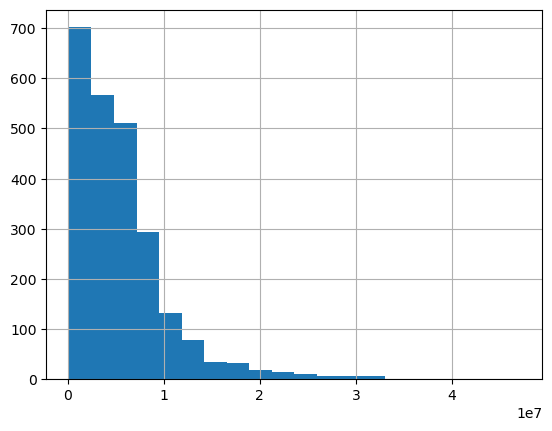

In [28]:
df["Volume"].hist(bins=20)

<Axes: >

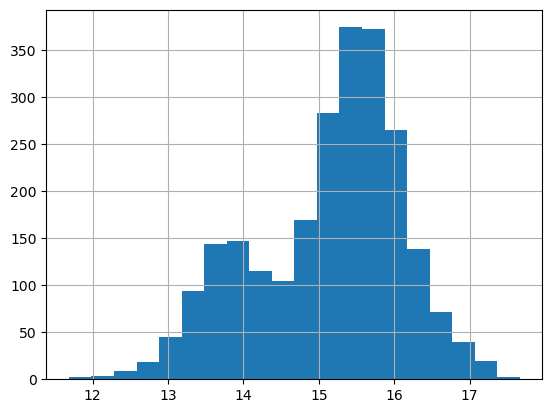

In [29]:
df["Volume"]=np.log(df["Volume"])
df["Volume"].hist(bins=20)

### Checking Outliers

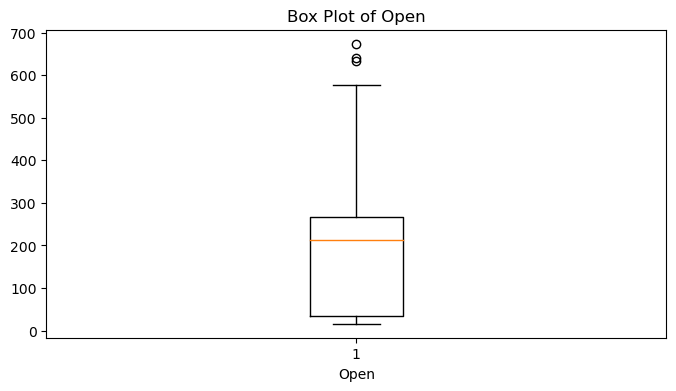

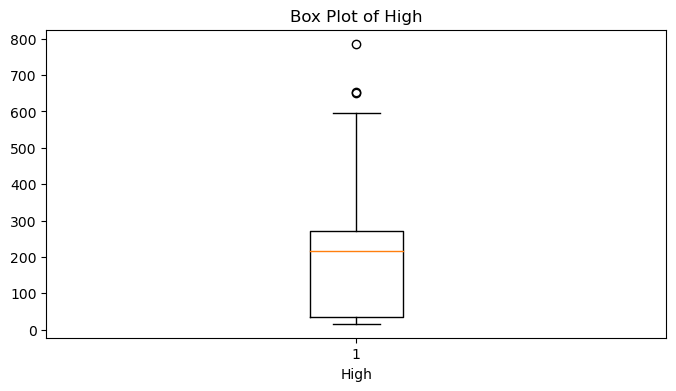

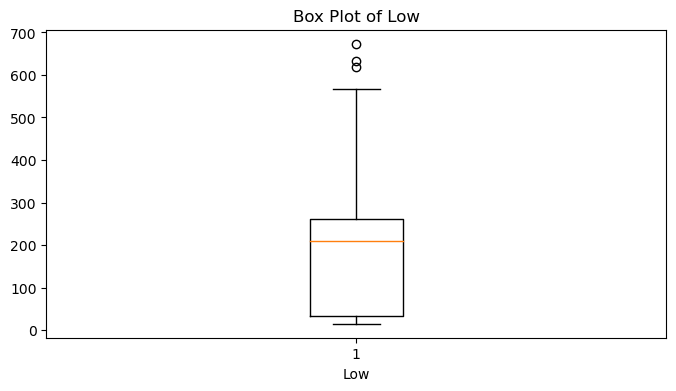

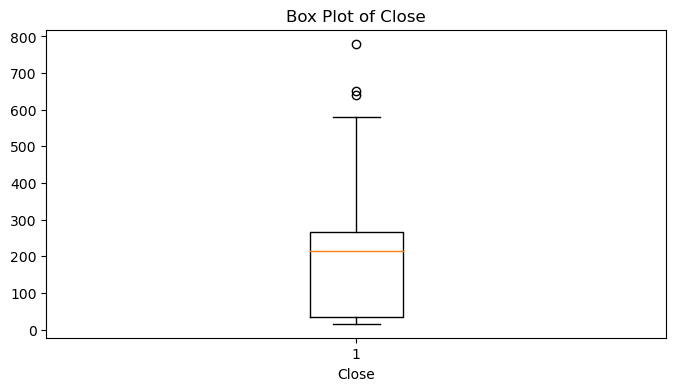

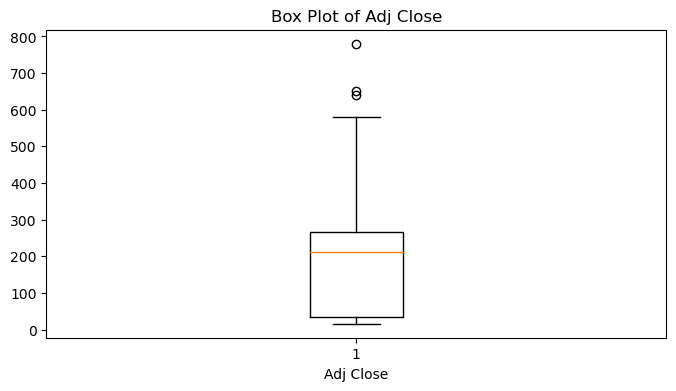

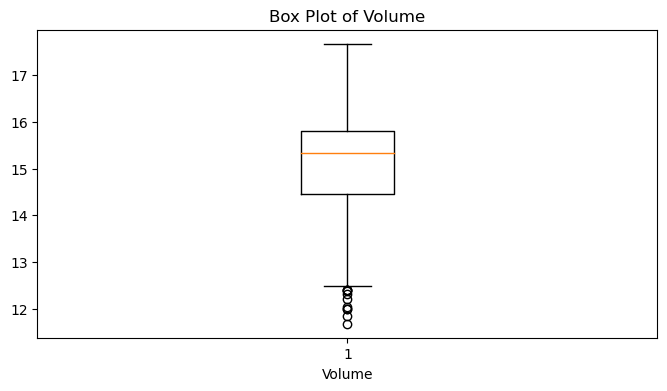

In [30]:
numeric_columns = df.select_dtypes(include=['number']).columns

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

In [31]:
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,16.747573
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,16.659670
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,15.921935
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,15.452525
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,15.742223
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,16.282635
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,16.694793
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,17.183003
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,16.570400


#### Outliers Removal

In [32]:
# IQR
# Calculate the upper and lower limits
Q1 = df['Open'].quantile(0.25)
Q3 = df['Open'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['Open'] >= upper)[0]
lower_array = np.where(df['Open'] <= lower)[0]
 
# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", df.shape)

New Shape:  (2413, 7)


In [33]:
Q1 = df['High'].quantile(0.25)
Q3 = df['High'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df['High'] >= upper)[0]
lower_array = np.where(df['High'] <= lower)[0]

df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

print("New Shape: ", df.shape)

New Shape:  (2413, 7)


In [34]:
Q1 = df['Low'].quantile(0.25)
Q3 = df['Low'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df['Low'] >= upper)[0]
lower_array = np.where(df['Low'] <= lower)[0]

df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

print("New Shape: ", df.shape)

New Shape:  (2413, 7)


In [35]:
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df['Close'] >= upper)[0]
lower_array = np.where(df['Close'] <= lower)[0]

df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

print("New Shape: ", df.shape)

New Shape:  (2413, 7)


In [36]:
Q1 = df['Adj Close'].quantile(0.25)
Q3 = df['Adj Close'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df['Adj Close'] >= upper)[0]
lower_array = np.where(df['Adj Close'] <= lower)[0]

df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

print("New Shape: ", df.shape)

New Shape:  (2413, 7)


In [37]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df['Volume'] >= upper)[0]
lower_array = np.where(df['Volume'] <= lower)[0]

df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

print("New Shape: ", df.shape)

New Shape:  (2402, 7)


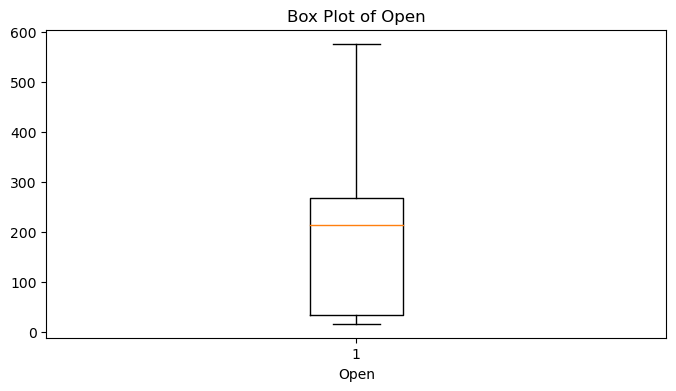

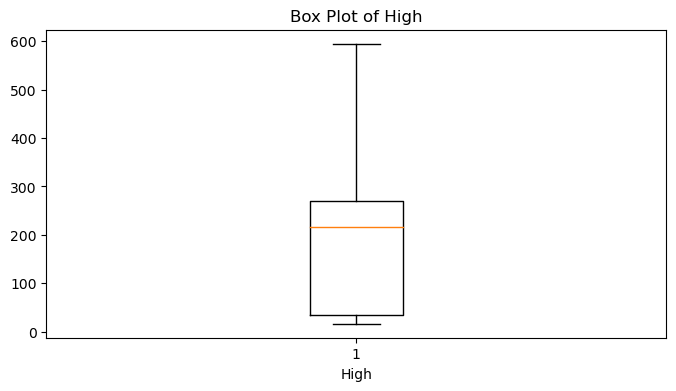

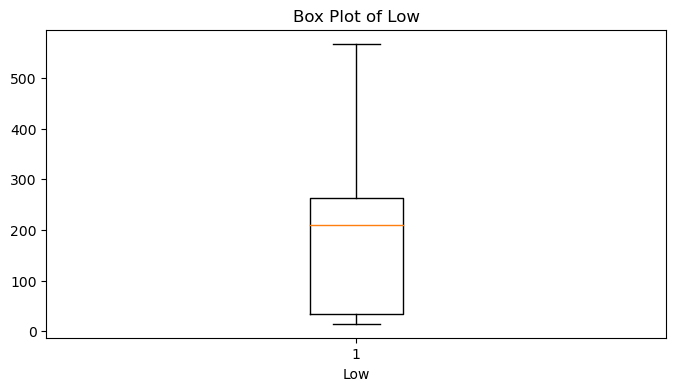

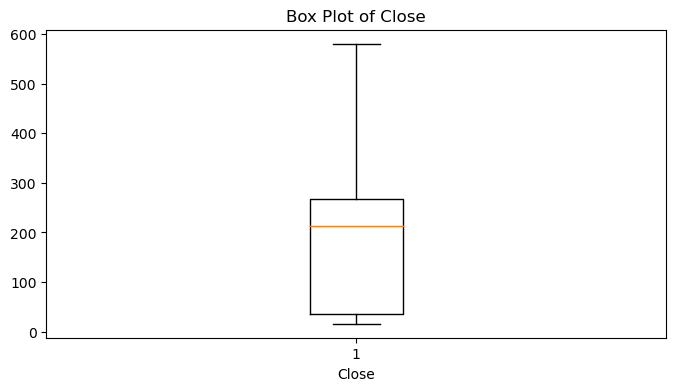

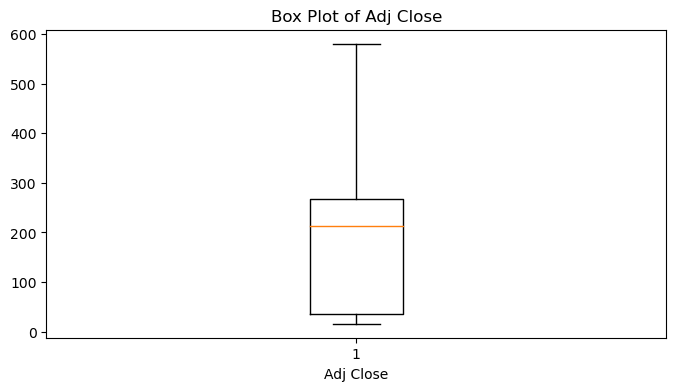

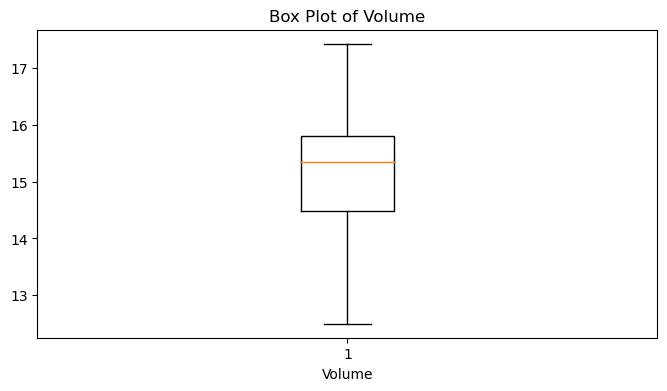

In [38]:
numeric_columns = df.select_dtypes(include=['number']).columns

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

### Splitting The Data

In [39]:
target_variable = 'Adj Close'
features = df.drop(['Date', target_variable], axis=1)

X = features  
y = df[target_variable] 

print("Shape of X:", X.shape)
print("Shape of Y:", y.shape)

Shape of X: (2402, 5)
Shape of Y: (2402,)


#### Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### importing the model

In [41]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)

#### Model Evaluation

In [42]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [43]:
print("MAE",mae)
print("MSE",mse)
print("RMSE",rmse)
print("Accuracy : ",r2)

MAE 1.7045345680440296
MSE 13.529668339174869
RMSE 3.6782697480167044
Accuracy :  0.9990612341951202
